In [ ]:
# モジュールのimport
from sklearn.datasets import make_classification
# プロット用モジュール
import matplotlib.pyplot as plt
import matplotlib

# データX, ラベルyを生成
# 分類に適したデータを作成するには、scikit-learn.datasetsモジュールの make_classification() 関数を使います。

# n_samples
#       用意するデータの個数
# n_classes
#       クラス数。指定しないと値は2になります
# n_features
#       データの特徴量の個数
# n_redundant
#       分類に不要な特徴量（余分な特徴量）の個数
# random_state
#       乱数のシード（乱数のパターンを決定する要素）

X, y = make_classification(n_samples=50, n_classes=2, n_features=2, n_redundant=0, random_state=0)


# データの色付け、プロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)
plt.grid(True)
plt.plot()
plt.show()

In [ ]:
#  モジュールのインポート
# モデルごとに別のモジュールを参照する
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# データの生成
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
# データを学習に使う分と評価の分に分ける
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの構築
model = LogisticRegression(random_state=42)
# モデルの学習
model.fit(train_X, train_y)
# モデルによるデータの予測
pred_y = model.predict(test_X)

# モデルの正解率
# 正解率は (モデルの予測した分類と実際の分類が一致したデータの数) ÷ (データの総数) で算出される
print(model.score(test_X, test_y))
print(model.score(test_X, pred_y))

In [ ]:
ロジスティック回帰
線形分離可能なデータの境界線を見つける
境界線は直線である
データがクラスに分類される確率も計算できる


In [ ]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
# ページ上で直接グラフが見られるようにするおまじない

# データの生成
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの構築
model = LogisticRegression()

# train_Xとtrain_yを使ってモデルに学習させる
model.fit(train_X, train_y)
# test_Xに対するモデルの分類予測結果
pred_y = model.predict(test_X)


# 生成したデータをプロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)

# 学習して導出した識別境界線をプロット
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * \
    Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi, Y)

# グラフのスケールを調整
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
plt.axes().set_aspect("equal", "datalim")
# グラフにタイトルを設定する
plt.title("classification data using LogisticRegression")
# x軸、y軸それぞれに名前を設定する
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [ ]:
線形SVM(サポートベクターマシン)
ロジスティック回帰と同様、データの境界線を見つけることでデータの分類を行う
サポートベクターとは、クラスごとの境界線に最も近いデータと境界線の距離のこと(厳密には距離を表すベクトルのことです)
このサポートベクターの距離の総和を最大化しようとする(この問題をマージン最大化と言います。)ことによって境界線を決定する手法がSVMです
SVMは分類する境界線が二クラス間の最も離れた場所に引かれるためロジスティック回帰と比べて一般化されやすく、
データの分類予測が向上する傾向が見られます。
また、境界線の決定にはサポートベクターのみを考えればよいため、筋道がたちやすいのも特徴です。

欠点としてデータ量が増えると計算量が増えてしまうため、他の手法に比べ学習や予測が遅くなる傾向があるという点が挙げられます。

1.0


/Users/nagatafutoshi/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


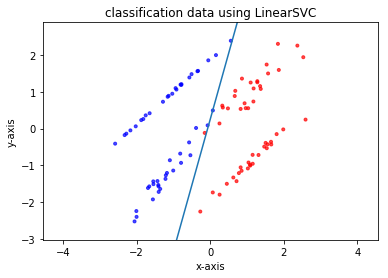

In [3]:
# パッケージをインポート
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# データの生成
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# モデルの構築
model = LinearSVC()

# train_Xとtrain_yを使ってモデルに学習させる
model.fit(train_X, train_y)

# test_Xとtest_yを用いたモデルの正解率を出力
print(model.score(test_X, test_y))

# 生成したデータをプロット
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".",
            cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)

# 学習して導出した識別境界線をプロット
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi, Y)

# グラフのスケールを調整
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)
plt.axes().set_aspect("equal", "datalim")
# グラフにタイトルを設定する
plt.title("classification data using LinearSVC")
# x軸、y軸それぞれに名前を設定する
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [ ]:
非線形SVM
カーネル関数と呼ばれる変換式に従ってデータを操作することで、データが線形分離可能な状態となる場合があります。
そのような処理を行ってくれるモデルがSVMには存在します。
カーネル関数による操作はその操作の結果を知らずに分類を行うことが可能なのでカーネルトリックとも呼ばれます。

In [6]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles

# データの生成
X, y = make_gaussian_quantiles(
    n_samples=1000, n_classes=2, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 以下にコードを記述してください
# モデルの構築
model1 = SVC()
model2 = LinearSVC()

# train_Xとtrain_yを使ってモデルに学習させる
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)


# 正解率の算出
print("非線形SVM: {}".format(model1.score(test_X, test_y)))
print("線形SVM: {}".format(model2.score(test_X, test_y)))

非線形SVM: 0.976
線形SVM: 0.528


In [ ]:
決定木

決定木はこれまで紹介したロジスティック回帰やSVMとは違い、データの要素（説明変数）の一つ一つに着目し、その要素内でのある値を境にデータを分割していくことでデータの属するクラスを決定しようとする手法です。

決定木では説明変数の一つ一つが目的変数にどのくらいの影響を与えているのかを見ることができます。
分割を繰り返すことで枝分かれしていきますが、先に分割される変数ほど影響力が大きいと捉えることができます。

欠点は線形分離可能なデータは苦手であること(例えば２次元データでは境界線が斜めに引けない)と、学習が教師データに寄りすぎる(汎化されない)ことです。

In [7]:
# 必要なパッケージをインポート
import requests
import zipfile
from io import StringIO
import io
import pandas as pd
# データの前処理に必要なパッケージのインポート
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# url
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

# データの形式変換
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

# データに名前をつける(データを扱いやすくするため)
mush_data.columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", "bruises",
                     "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
                     "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
                     "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
                     "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

# カテゴリー変数(色の種類など数字の大小が決められないもの)をダミー特徴量(yes or no)として変換する
mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])

# 目的変数：flg立てをする
mush_data_dummy["flg"] = mush_data["classes"].map(
    lambda x: 1 if x == "p" else 0)

# 説明変数と目的変数
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(X,Y, random_state=42)

# 以下にコードを記述してください。
# モデルの読み込み
from sklearn.tree import DecisionTreeClassifier

# モデルの構築
model = DecisionTreeClassifier()

# モデルの学習
model.fit(train_X, train_y)

# 正解率を算出
print(model.score(test_X, test_y))

0.909404234367


In [ ]:
ランダムフォレスト

決定木の簡易版を複数作り、分類の結果を多数決で決める手法です。 
複数の簡易分類器を一つの分類器にまとめて学習させる、 アンサンブル学習 と呼ばれる学習の種類の一手法でもあります。

決定木では使用する説明変数は全て使用していたのに対し、ランダムフォレストの一つ一つの決定木はランダムに決められた少数の説明変数だけを用いてデータの属するクラスを決定しようとします。 
その上で複数の簡易決定木から出力されるクラスのうちで最も多かったクラスを結果として出力します。

ランダムフォレストの特徴は決定木と同じように、線形分離可能でない複雑な識別範囲を持つデータ集合の分類が可能な点に加え、複数の分類器を通して多数決により結果を出力するため、外れ値によって予測結果が左右されにくいことが挙げられます。

欠点としては決定木と同じように説明変数の数に対してデータの数が少ないと二分木の分割ができず、予測の精度が下がってしまう点が挙げられます。


In [8]:
# きのこデータの取得
# 必要なパッケージをインポート
import requests
import zipfile
from io import StringIO
import io
import pandas as pd
# データの前処理に必要なパッケージのインポート
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# url
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

# データの形式変換
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

# データに名前をつける(データを扱いやすくするため)
mush_data.columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", "bruises",
                     "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
                     "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
                     "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
                     "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

# カテゴリー変数(色の種類など数字の大小が決められないもの)をダミー特徴量(yes or no)として変換する
mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])
# 目的変数：flg立てをする
mush_data_dummy["flg"] = mush_data["classes"].map(
    lambda x: 1 if x == "p" else 0)

# 説明変数と目的変数
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(X,Y, random_state=42)

# 以下にコードを記述してください。
# モデルの読み込み
from sklearn.ensemble import RandomForestClassifier

# モデルの構築
model = RandomForestClassifier()

# モデルの学習
model.fit(train_X,train_y)

# 正解率を算出
print(model.score(test_X, test_y))

0.910881339242


In [ ]:
K-NN(k-近傍法)

予測をするデータと類似したデータをいくつか見つけ、多数決により分類結果を決める手法です。 怠惰学習と呼ばれる学習の種類の一手法であり、 学習コスト（学習にかかる計算量）が0である ことが特徴です。

これまで紹介してきた手法とは違い、k-NNは教師データから学習するわけではなく、 予測時に教師データを直接参照 してラベルを予測します。 結果の予測を行う際に①教師データを予測に用いるデータとの類似度で並べ直し、②分類器に設定されたk個分のデータを類似度の高い順に参照し、③参照された教師データが属するクラスのなかで最も多かったものを予測結果として出力するのがこのk-NNという手法です。

k-NNの特徴としては、前述の通り学習コストが0であること、アルゴリズムとしては比較的単純なものなのですが高い予測精度がでやすいこと、複雑な形の境界線も表現しやすいことが挙げられます。 欠点としては分類器に指定する自然数kの個数を増やしすぎると識別範囲の平均化が進み予測精度が下がってしまう点や、予測時に毎回計算を行うため教師データや予測データの量が増えると計算量が増えてしまい、低速なアルゴリズムとなってしまう点が挙げられます。



In [12]:
# きのこデータの取得
import requests
import zipfile
from io import StringIO
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# url
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

# データの形式変換
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

# データに名前をつける(データを扱いやすくするため)
mush_data.columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", "bruises",
                     "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
                     "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
                     "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
                     "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

# 参考（カテゴリー変数をダミー特徴量として変換する方法）
mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])
# 目的変数：flg立てをする
mush_data_dummy["flg"] = mush_data["classes"].map(
    lambda x: 1 if x == "p" else 0)

# 説明変数と目的変数
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy["flg"]

# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(X,Y, random_state=42)

# 以下にコードを記述してください
# モデルの読み込み
from sklearn.neighbors import KNeighborsClassifier

# モデルの構築
model = KNeighborsClassifier()

# モデルの学習
model.fit(train_X, train_y)

# 正解率の表示
print(model.score(test_X, test_y))


0.903988183161
